In [1]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
#list_available_datasets()

# import dataset
wine_dataset = fetch_ucirepo(id=186)

In [2]:
wine_dataset.data.features

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [3]:
wine_dataset.data.targets

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [4]:
y = wine_dataset.data.targets
X = wine_dataset.data.features

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from pprint import pprint
pprint(wine_dataset.metadata.abstract)

('Two datasets are included, related to red and white vinho verde wine '
 'samples, from the north of Portugal. The goal is to model wine quality based '
 'on physicochemical tests (see [Cortez et al., 2009], '
 'http://www3.dsi.uminho.pt/pcortez/wine/).')


In [6]:
pprint(wine_dataset.metadata)

{'abstract': 'Two datasets are included, related to red and white vinho verde '
             'wine samples, from the north of Portugal. The goal is to model '
             'wine quality based on physicochemical tests (see [Cortez et al., '
             '2009], http://www3.dsi.uminho.pt/pcortez/wine/).',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': 'The two datasets are related to red and white '
                                'variants of the Portuguese "Vinho Verde" '
                                'wine. For more details, consult: '
                                'http://www.vinhoverde.pt/en/ or the reference '
                                '[Cortez et al., 2009].  Due to pri

Note:
This dataset has an additional column where you can see if the wine was red or white, could be a great binary classification problem.  Right now we will focus on predicting the quality of the wine from 0-10 which makes this a multi-classification problem.

In [7]:
# No missing values
X.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [8]:
print(f'Size of full dataset:{X.shape}')
print(f'Size of training dataset:{X_train.shape}')

Size of full dataset:(6497, 11)
Size of training dataset:(5197, 11)


In [9]:
import pandas as pd
X_full = pd.concat([X_train,y_train],axis=1)
X_full.groupby('quality').describe().transpose()

quality                      3           4            5            6  \
fixed_acidity count  24.000000  173.000000  1736.000000  2239.000000   
              mean    7.762500    7.294220     7.294067     7.166235   
              std     1.689047    1.230556     1.239742     1.283361   
              min     4.200000    4.800000     4.500000     3.800000   
              25%     6.775000    6.500000     6.500000     6.400000   
...                        ...         ...          ...          ...   
alcohol       min     8.000000    8.400000     8.000000     8.500000   
              25%     9.550000    9.400000     9.300000     9.600000   
              50%    10.150000   10.000000     9.600000    10.500000   
              75%    11.000000   10.800000    10.300000    11.400000   
              max    12.400000   13.500000    13.600000    14.000000   

quality                       7           8          9  
fixed_acidity count  864.000000  157.000000   4.000000  
              mean     7.143808    6.857325   7.500000  
              std      1.392953    1.182089   1.116542  
              min      4.200000    3.900000   6.600000  
              25%      6.400000    6.200000   6.825000  
...                         ...         ...        ...  
alcohol       min      8.600000    8.500000  10.400000  
              25%     10.637500   11.000000  11.900000  
              50%     11.400000   12.000000  12.450000  
              75%     12.300000   12.600000  12.550000  
              max     14.200000   14.000000  12.700000  

[88 rows x 7 columns]

In [10]:
print(y.value_counts())

quality
6          2836
5          2138
7          1079
4           216
8           193
3            30
9             5
Name: count, dtype: int64


In [11]:
y_train.value_counts()

quality
6          2239
5          1736
7           864
4           173
8           157
3            24
9             4
Name: count, dtype: int64

### Notes:
- The dataset is imbalanced, with the majority of the data being of quality 5 and 6.
- The dataset has no missing values.
- The dataset has 11 features and 1 target variable.
- Fitting a model to this dataset would not predict the quality of the wine well, as the dataset is imbalanced.The model would predict the majority class most of the time.


/var/folders/9n/6qfw0wb9635_kxh14d_gypm00000gn/T/ipykernel_9535/4271576847.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X_full, x='quality', y='fixed_acidity',


Text(0.5, 1.0, 'Fixed Acidity vs Quality')

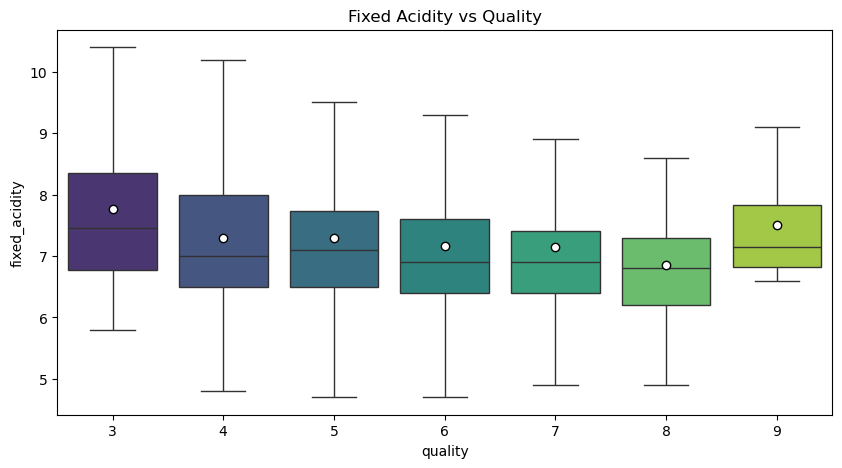

In [12]:
## Lets look at the distribution of features per class
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(data=X_full, x='quality', y='fixed_acidity',
            showmeans=True, meanprops={"marker":"o",
                                        "markerfacecolor":"white", 
                                        "markeredgecolor":"black"},
                                        showfliers=False, palette='viridis')
plt.title('Fixed Acidity vs Quality')


No outliershow means are inflated because plot excludes outliers but uses them to calculate the means in the data.
Wine acicity decreases with quality of the wine,

/var/folders/9n/6qfw0wb9635_kxh14d_gypm00000gn/T/ipykernel_9535/3127791691.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X_full,x='quality', y=feature,
/var/folders/9n/6qfw0wb9635_kxh14d_gypm00000gn/T/ipykernel_9535/3127791691.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X_full,x='quality', y=feature,
/var/folders/9n/6qfw0wb9635_kxh14d_gypm00000gn/T/ipykernel_9535/3127791691.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X_full,x='quality', y=feature,
/var/folders/9n/6qfw0wb9635_kxh14d_gypm00000gn/T/ipykernel

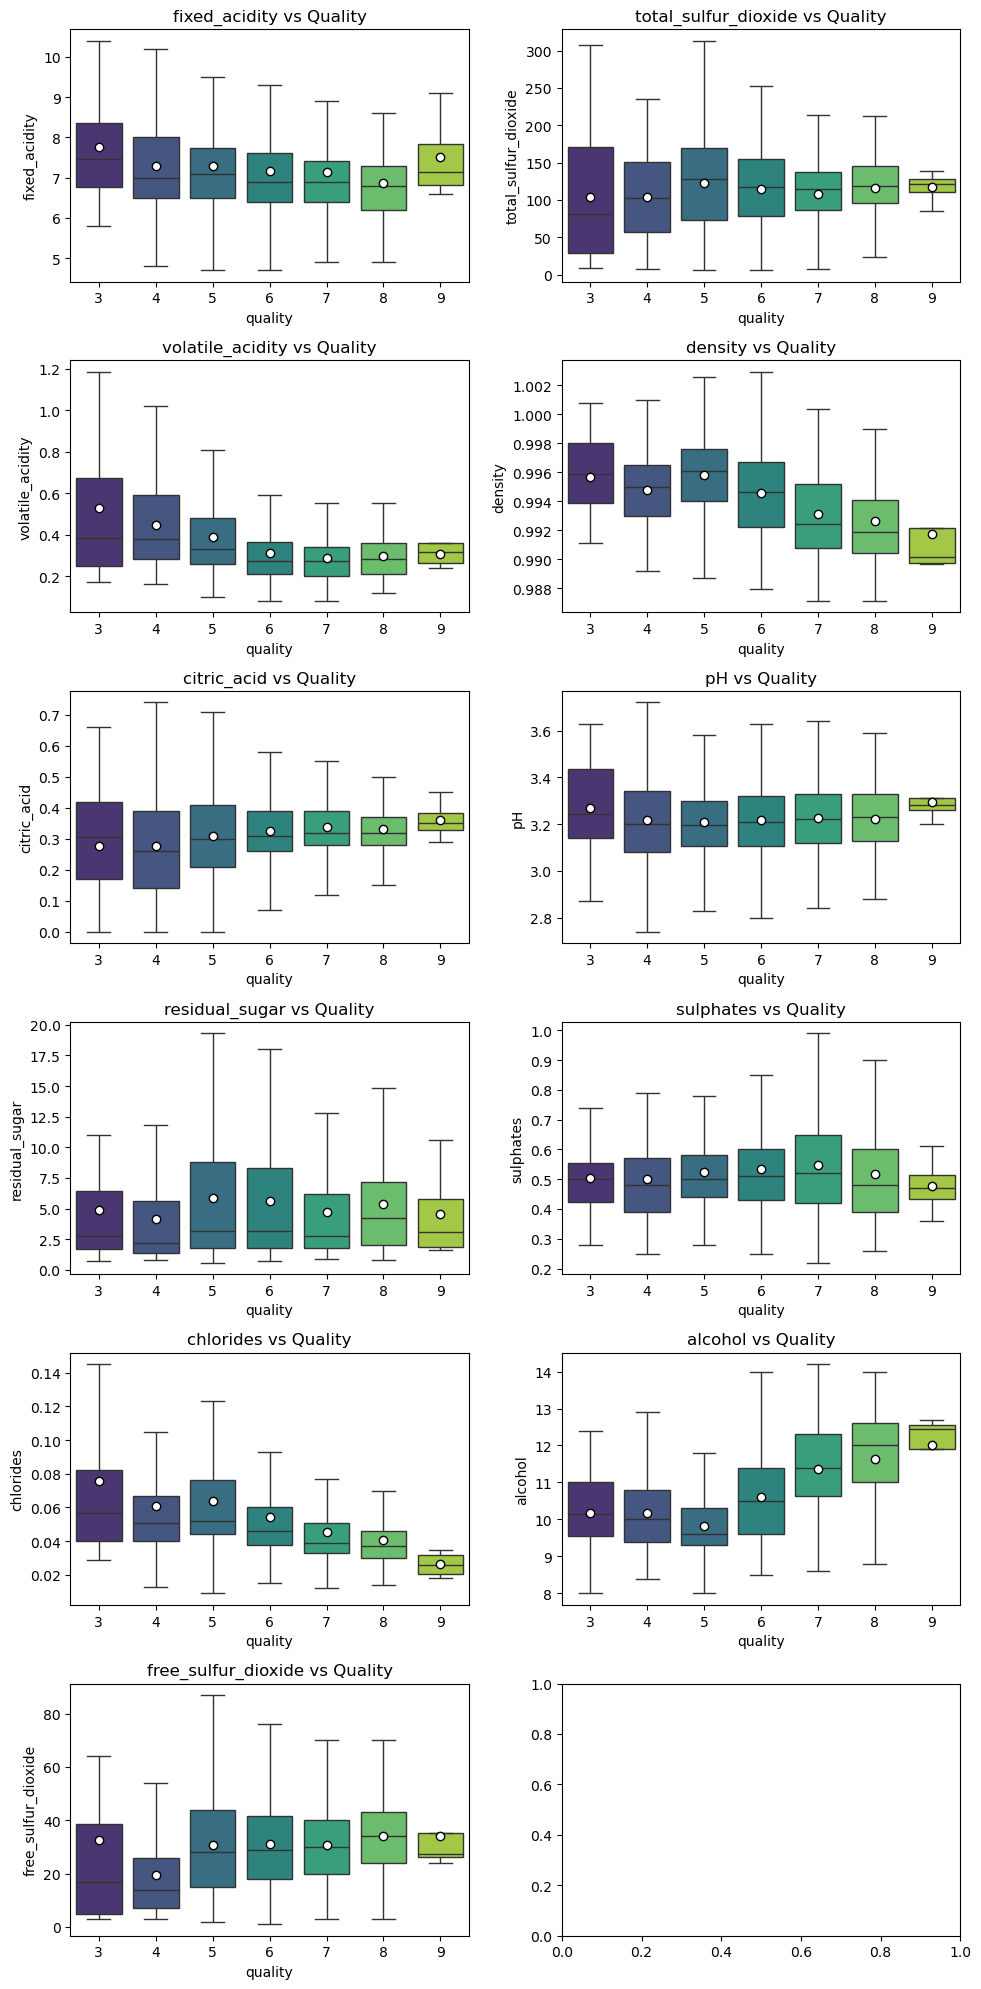

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10,20))
i = 0;j = 0
for feature in X_full.columns[:-1]:
    sns.boxplot(data=X_full,x='quality', y=feature,
                showmeans=True, meanprops={"marker":"o",
                                            "markerfacecolor":"white", 
                                            "markeredgecolor":"black"},
                                            showfliers=False, palette='viridis',
                                            ax=axes[i,j])
    axes[i,j].set_title(f'{feature} vs Quality')
    
    if i < 5:
        i += 1
    else:
        j += 1
        i = 0

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

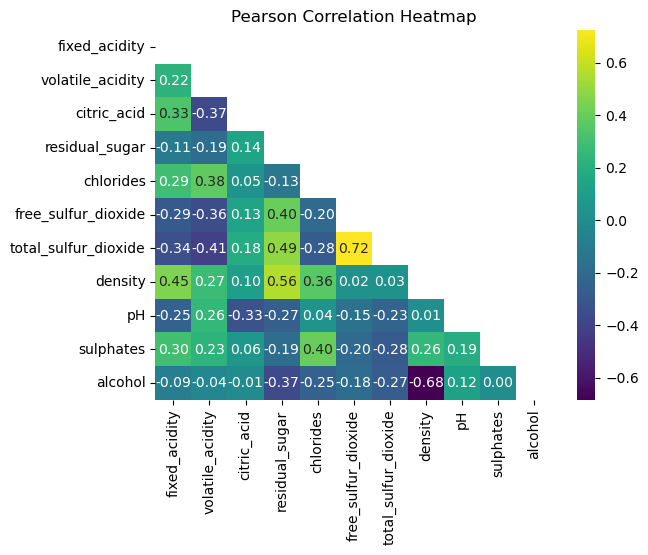

In [14]:
import numpy as np

sns.heatmap(X_train.corr(), annot = True, mask = np.triu(X_train.corr()), 
            cmap='viridis', fmt='.2f')            
plt.title('Pearson Correlation Heatmap')

### Notes:

- PH, residual_sugar, sulphates and total sulfur dioxide seems unaffected by quality based on mean, although there are variable variance mostly due to variation in sample sizes per category.
- Correlation between free_sulfur dioxide and total_sulfur which may indicate that total sulfur is a measurement that might involve in itself the addition of free_sulfur (redundant variable).
- Negative correlation between density and alcohol "strong" after quality 5 and above. No strong relationship found in other variables. 
- These findings would be similar to what would be found under an ANOVA test.

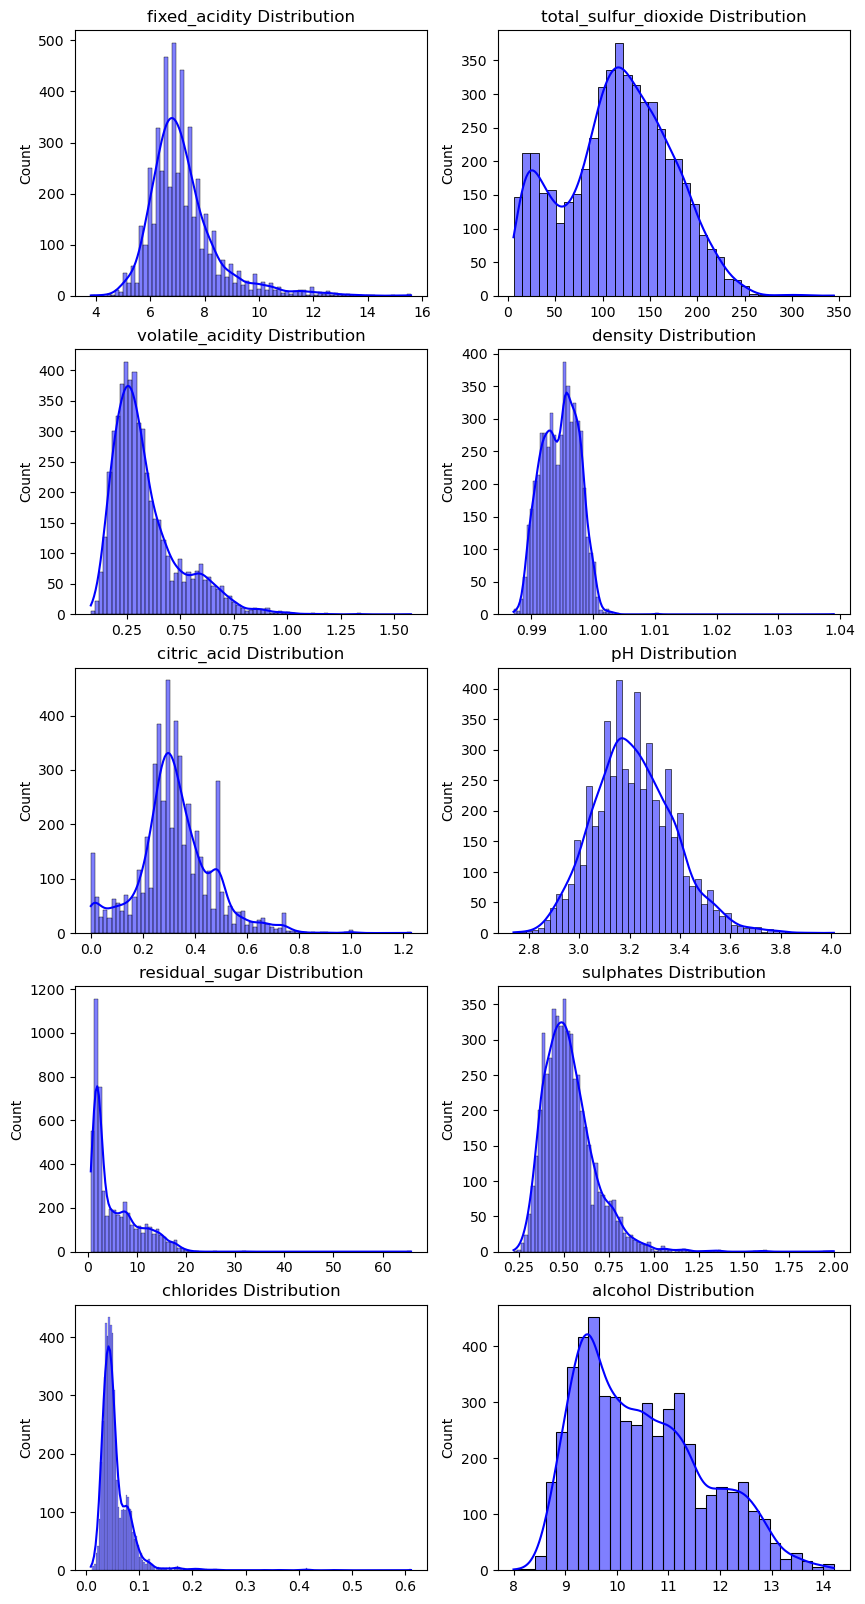

In [15]:
X_train.drop('free_sulfur_dioxide', axis=1, inplace=True)
X_test.drop('free_sulfur_dioxide', axis=1, inplace=True)

## Distribution of features
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,20))
i = 0;j = 0
for feature in X_train.columns:
    sns.histplot(data=X_train,x=feature, kde=True, ax=axes[i,j], color='blue')
    axes[i,j].set_title(f'{feature} Distribution')
    axes[i,j].set_xlabel('') #remove x label

    #Update axes
    if i < 4:
        i += 1
    else:
        j += 1
        i = 0

Some features have a right skew so lets apply a log transformation to shift its distribution to a more normal one.  
Then I will apply a standarization,  before doing the downstream analysis I would like to do feature selection and move forward with the best features for the model, this to prevent overfitting.

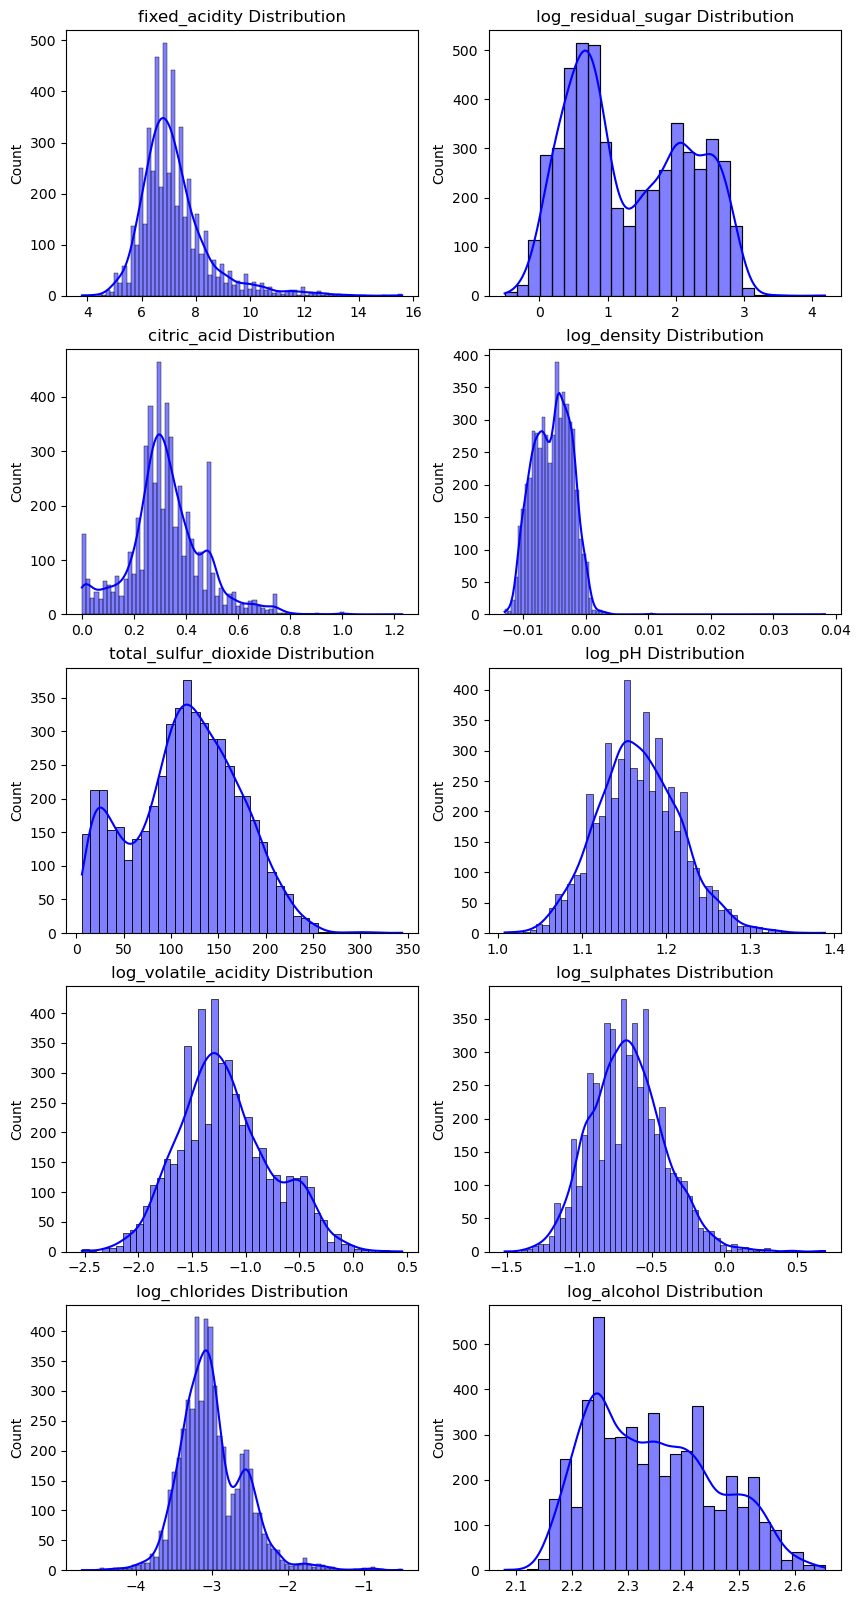

In [16]:
import numpy as np

#Before transformation of features I will create a copy of the original dataset
X_train_original = X_train.copy()
X_test_original = X_test.copy()


features_to_scale = ['volatile_acidity','chlorides','residual_sugar','density','pH','sulphates','alcohol']
for f in features_to_scale:
    X_train['log_'+f] = np.log(X_train[f])
    X_test['log_'+f] = np.log(X_test[f])

X_train.drop(features_to_scale, axis=1, inplace=True)
X_test.drop(features_to_scale, axis=1, inplace=True)    

## Distribution of features
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,20))
i = 0;j = 0
for feature in X_train.columns:
    sns.histplot(data=X_train, x=feature, kde=True, ax=axes[i,j], color='blue')
    axes[i,j].set_title(f'{feature} Distribution')
    axes[i,j].set_xlabel('') #remove x label

    #Update axes
    if i < 4:
        i += 1
    else:
        j += 1
        i = 0


Text(0.5, 1.0, 'Vars Pearson Correlation Heatmap')

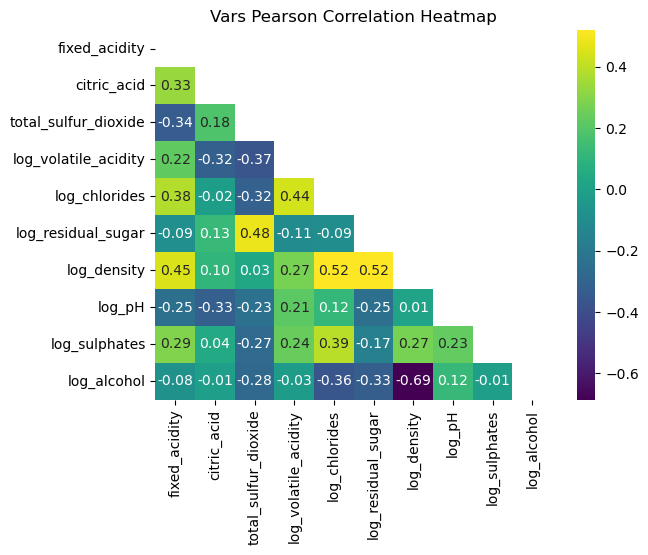

In [17]:
import numpy as np

sns.heatmap(X_train.corr(), annot = True, mask = np.triu(X_train.corr()), 
            cmap='viridis', fmt='.2f')            
plt.title('Vars Pearson Correlation Heatmap')

In [18]:
## Feature Selection
# LETS standarize the data prior to feature selection
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
y_train

,quality
1916,5
947,7
877,6
2927,6
6063,5
...,...
3772,5
5191,7
5226,5
5390,5


In [20]:
## Save the dataset
import os
os.makedirs('Data', exist_ok=True)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled['quality'] = y_train
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled['quality'] = y_test
X_train_scaled.to_csv('Data/X_train_scaled.csv', index=False)
X_test_scaled.to_csv('Data/X_test_scaled.csv', index=False)

In [21]:
## Feature Selection using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

#Class_weight='balanced' to handles the imbalanced dataset by giving more weight to minority class.
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, class_weight='balanced')
clf.fit(X_train, y_train)

# Feature importance
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]



/Users/dlebron/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [23]:
#gini_importance is an indicator of purity or how well a feature can split the data.
importances

array([0.09195028, 0.07968517, 0.09924435, 0.10396208, 0.12344251,
       0.09301684, 0.11750754, 0.09167967, 0.07697171, 0.12253984])

In [24]:
top4 = X_train.columns[indices][:4]
top4

Index(['log_chlorides', 'log_alcohol', 'log_density', 'log_volatile_acidity'], dtype='object')

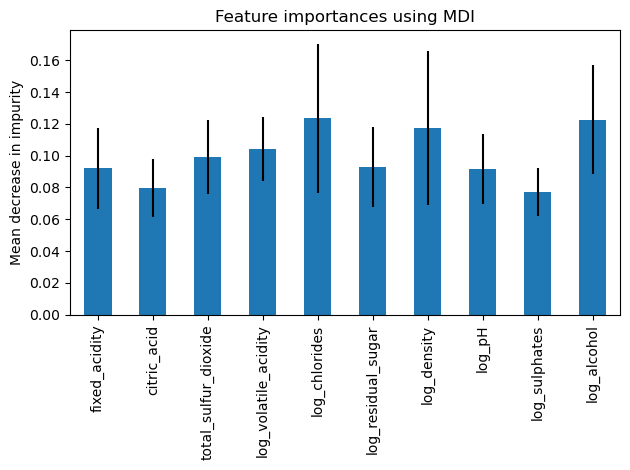

In [25]:
import pandas as pd
#Impurity based importance
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

before training... I think that re-classifying the target variable is a good idea, due to the imbalance of the classes. I will classify the wines as good or bad based on the quality. 
- Wines with a quality of 3-4 will be classified as quality low
- Wines with a quality of 5-6 will be classified as quality medium
- Wines with a quality of 7-9 will be high

In [26]:
y_train.value_counts()

quality
6          2239
5          1736
7           864
4           173
8           157
3            24
9             4
Name: count, dtype: int64

In [27]:
type(y_train)
y_train = y_train.astype('str')
y_test = y_test.astype('str')

In [30]:
## Lets now deal with the imbalanced dataset using SMOTE -- Synthetic Mibirotic Over Sampling Technique

from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

oversample = SMOTE(k_neighbors=2)

X_resampled, y_train_resampled = oversample.fit_resample(X_train[top4], y_train)

print(f'Original dataset shape {y_train.value_counts()}')
print(f'Resampled dataset shape {y_train_resampled.value_counts()}')

Original dataset shape quality
6          2239
5          1736
7           864
4           173
8           157
3            24
9             4
Name: count, dtype: int64
Resampled dataset shape quality
3          2239
4          2239
5          2239
6          2239
7          2239
8          2239
9          2239
Name: count, dtype: int64


## Multi-class classification
Try:
1. Multi-class AdaBoost
2. CatBoost
3. XGBoost
4. LightGBM
5. Random Forest
6. SVM
7. Neural Network, etc.

In [35]:
## Fit models on the resampled dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

remap_dict = {'3':'low',
            '4':'low', 
            '5':'medium',
            '6':'medium',
            '7':'medium',
            '8':'high',
            '9':'high'}

y_train_mapped = y_train_resampled.replace(remap_dict)

# Initialize the encoder
encoder = LabelEncoder()

# Fit and transform the categorical columns
y_train_encoded = encoder.fit_transform(y_train_mapped.values)
y_test_encoded = encoder.fit_transform(y_test.replace(remap_dict))

for n in [50,100,200]:
    clf = RandomForestClassifier(n_estimators=n, random_state=0, n_jobs=-1, class_weight='balanced')
    clf.fit(X_resampled, y_train_encoded)
    y_pred = clf.predict(X_test[top4])

    print(f'Classification report for {n} estimators')
    print(classification_report(y_test_encoded, y_pred))
    print((f'Accuracy score for {n} estimators: %s') % (accuracy_score(y_test_encoded, y_pred)))


/Users/dlebron/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dlebron/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report for 50 estimators
              precision    recall  f1-score   support

           0       0.41      0.38      0.39        37
           1       0.25      0.27      0.26        49
           2       0.95      0.95      0.95      1214

    accuracy                           0.91      1300
   macro avg       0.54      0.53      0.54      1300
weighted avg       0.91      0.91      0.91      1300

Accuracy score for 50 estimators: 0.91
Classification report for 100 estimators
              precision    recall  f1-score   support

           0       0.45      0.38      0.41        37
           1       0.27      0.27      0.27        49
           2       0.95      0.96      0.95      1214

    accuracy                           0.91      1300
   macro avg       0.56      0.53      0.54      1300
weighted avg       0.91      0.91      0.91      1300

Accuracy score for 100 estimators: 0.9138461538461539
Classification report for 200 estimators
              precision

## CatBoost
- CatBoost is a gradient boosting library that is designed for handling categorical data. It is based on decision trees and is designed to work with categorical data. It is a powerful library that can handle categorical data without the need for one-hot encoding.
- Reduces time in parameter tunning 
- Reduction of overfitting with gradient boosting on decision trees.
- Incorporation of various types of data, doesnt need to be from a homogeneous source
- Training data limited whereas deep learning requires a lot of data.
 - **boosting methods sequentially learn from weak classifiers  with the goal of minimizing errors from preceding classifiers.**

In [54]:
## CatBoost
from catboost import CatBoostClassifier
CatModel = CatBoostClassifier(custom_metric=['Accuracy'], 
                              random_seed = 42, 
                              loss_function = 'MultiClass',
                              learning_rate = 0.1)
#eval_set allows the models performance to be monitored during training
CatModel.fit(X_resampled, y_train_mapped, verbose=200, eval_set=(X_test[top4], y_test_mapped))
y_predCat = CatModel.predict(X_test[top4])
print(f'Accuracy score for CatBoost: {round(accuracy_score(y_test_mapped, y_predCat),4)}')
print(classification_report(y_test_mapped, y_predCat))

0:	learn: 1.0494794	test: 1.0536134	best: 1.0536134 (0)	total: 5.49ms	remaining: 5.48s
200:	learn: 0.3809977	test: 0.4728821	best: 0.4728821 (200)	total: 378ms	remaining: 1.5s
400:	learn: 0.2570129	test: 0.3797460	best: 0.3797460 (400)	total: 724ms	remaining: 1.08s
600:	learn: 0.1974164	test: 0.3409259	best: 0.3409259 (600)	total: 1.07s	remaining: 710ms
800:	learn: 0.1578996	test: 0.3223640	best: 0.3221955 (798)	total: 1.42s	remaining: 352ms
999:	learn: 0.1325999	test: 0.3160881	best: 0.3160881 (999)	total: 1.76s	remaining: 0us

bestTest = 0.3160880806
bestIteration = 999

Accuracy score for CatBoost: 0.9054
              precision    recall  f1-score   support

        high       0.39      0.32      0.35        37
         low       0.19      0.18      0.19        49
      medium       0.95      0.95      0.95      1214

    accuracy                           0.91      1300
   macro avg       0.51      0.49      0.50      1300
weighted avg       0.90      0.91      0.90      1300



In [55]:
CatBoostClassifier?

Init signature:
CatBoostClassifier(
    iterations=None,
    learning_rate=None,
    depth=None,
    l2_leaf_reg=None,
    model_size_reg=None,
    rsm=None,
    loss_function=None,
    border_count=None,
    feature_border_type=None,
    per_float_feature_quantization=None,
    input_borders=None,
    output_borders=None,
    fold_permutation_block=None,
    od_pval=None,
    od_wait=None,
    od_type=None,
    nan_mode=None,
    counter_calc_method=None,
    leaf_estimation_iterations=None,
    leaf_estimation_method=None,
    thread_count=None,
    random_seed=None,
    use_best_model=None,
    best_model_min_trees=None,
    verbose=None,
    silent=None,
    logging_level=None,
    metric_period=None,
    ctr_leaf_count_limit=None,
    store_all_simple_ctr=None,
    max_ctr_complexity=None,
    has_time=None,
    allow_const_label=None,
    target_border=None,
    classes_count=None,
    class_weights=None,
    auto_class_weights=None,
    class_names=None,
    one_hot_max_size=Non

In [81]:
## Lets apply cross validation to the CatBoost model
from sklearn.model_selection import cross_val_score, cross_validate

CatModel1 = CatBoostClassifier(random_seed = 42, 
                              verbose = False,
                              loss_function = 'MultiClass',
                              learning_rate = 0.1)

scores = cross_validate(CatModel1, X_resampled,
                         y_train_mapped,
                         cv=5, scoring='accuracy',
                         n_jobs = -1)

scores['test_score'].mean()

0.9221545858613001

In [70]:
# Lets use GridSearchCV to tune the hyperparameters
# - n_estimators: number of trees in the forest a greater number of trees will reduce overfitting but increase computational cost
# - max_depth: maximum depth of the tree
# - learning_rate: shrinks the contribution of each tree
# - subsample: fraction of samples used to fit each tree

from sklearn.model_selection import GridSearchCV


#State the number of parameter options and values you want to tune.
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'depth': [4, 6, 10],
              'n_estimators': [50, 100, 200],
              'l2_leaf_reg': [1, 3, 5]}

#Instantiate the model
CatModel = CatBoostClassifier(random_seed = 42, 
                              verbose = False,
                              loss_function = 'MultiClass')

#Instantiate the GridSearchCV object ; couldve also used 
gscv = GridSearchCV(CatModel, param_grid, cv=5, scoring='accuracy')

#fit the model
gscv.fit(X_resampled, y_train_mapped)

#Get the best parameters
print(f'Best parameters: {gscv.best_params_}')
print(f'Best score: {round(gscv.best_score_,4)}')


Best parameters: {'depth': 10, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'n_estimators': 200}
Best score: 0.9051


In [49]:
## XGBClassifier
# Cross validation is built in as out-of-the-box functionality.

from xgboost import XGBClassifier
XGBModel = XGBClassifier()
XGBModel.fit(X_resampled, y_train_encoded)
y_predXGB = XGBModel.predict(X_test[top4])

print(f'Accuracy score for XGBClassifier: {round(accuracy_score(y_test_encoded, y_predXGB),4)}')
print(classification_report(y_test_encoded, y_predXGB))

Accuracy score for XGBClassifier: 0.9015384615384615
              precision    recall  f1-score   support

           0       0.42      0.38      0.40        37
           1       0.14      0.14      0.14        49
           2       0.95      0.95      0.95      1214

    accuracy                           0.90      1300
   macro avg       0.50      0.49      0.50      1300
weighted avg       0.90      0.90      0.90      1300



### Accuracy of results is good but keeps scoring better for the majority class.  Without the oversampling in previous tests, the accuracy was around 0.6.

Text(0.5, 1.0, 'Confusion Matrix')

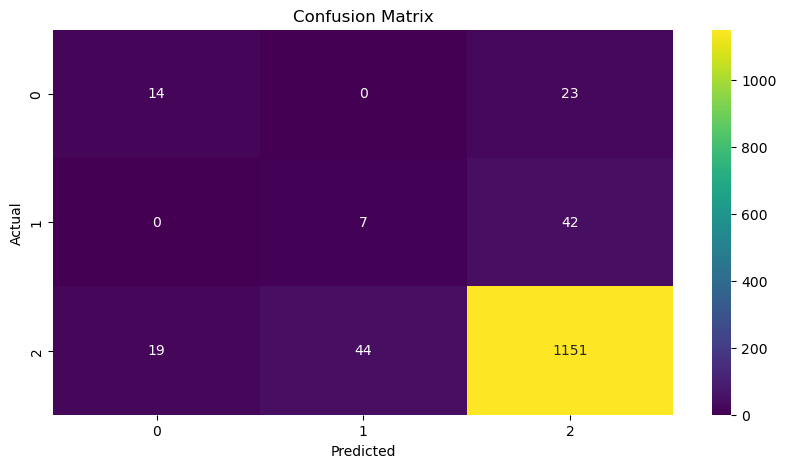

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_encoded, y_predXGB)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


In [83]:
## AdaBoost could be the fourth classifier that helps due to its ability to boost the performance of weak learners, which could probably aid the minority class.
from sklearn.ensemble import AdaBoostClassifier

AdaModel = AdaBoostClassifier()
AdaModel.fit(X_resampled, y_train_encoded)
y_predAda = AdaModel.predict(X_test[top4])

print(f'Accuracy score for AdaBoostClassifier: {round(accuracy_score(y_test_encoded, y_predAda),4)}')
print(classification_report(y_test_encoded, y_predAda))

/Users/dlebron/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy score for AdaBoostClassifier: 0.5754
              precision    recall  f1-score   support

           0       0.07      0.35      0.11        37
           1       0.07      0.51      0.12        49
           2       0.94      0.58      0.72      1214

    accuracy                           0.58      1300
   macro avg       0.36      0.48      0.32      1300
weighted avg       0.89      0.58      0.68      1300



## Notes: 
The best model was the CatBoostClassifier. The model was trained on the resampled dataset using SMOTE to handle the imbalanced dataset. The model was further tuned using GridSearchCV to find the best hyperparameters. The model was then cross-validated to ensure that the model was not overfitting. The model was then evaluated on the test dataset and achieved an accuracy of 0.91. The model was also evaluated using the classification report and confusion matrix. The model performed well on the test dataset and could be used to predict the quality of wine based on the features provided.